<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/LeNet5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers 
from sklearn.metrics import confusion_matrix


import cv2

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.python.client import device_lib

In [3]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

if device_lib.list_local_devices()[1].device_type == 'GPU':
    print(' ####################### ##################### ####################')
    print('GPU is enabled, The Spec is:')
    print( device_lib.list_local_devices()[1].physical_device_desc)
    print(' ####################### ##################### ####################')
else: 
    print(' ####################### ##################### ####################')
    print('There is no GPU available... ')
    print(' ####################### ##################### ####################')
    print(' ####################### ##################### ####################')

 ####################### ##################### ####################
GPU is enabled, The Spec is:
device: 0, name: GRID A100-10C, pci bus id: 0000:00:05.0, compute capability: 8.0
 ####################### ##################### ####################


In [4]:
(xtrain, ytrain), (xtest, ytest) = load_data()
xtrain = xtrain.astype('float32') /255.
xtest = xtest.astype('float32') /255.
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

print('Original Dimensions : ',xtrain.shape)

xtrain = np.expand_dims(xtrain, axis=3)
xtest = np.expand_dims(xtest, axis=3)

print(xtrain.shape)

Original Dimensions :  (60000, 28, 28)
(60000, 28, 28, 1)


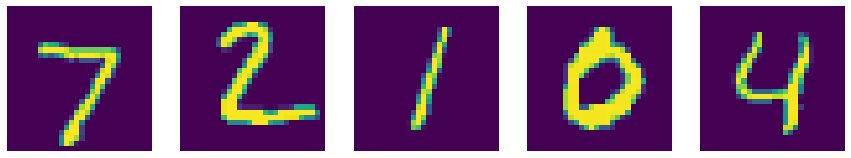

In [5]:
plt.figure(figsize = (15,8))
plt.subplot(1,5,1)
plt.imshow(tf.squeeze(xtest[0]))
plt.axis('off')
plt.subplot(1,5,2)
plt.imshow(tf.squeeze(xtest[1]))
plt.axis('off')
plt.subplot(1,5,3)
plt.imshow(tf.squeeze(xtest[2]))
plt.axis('off')
plt.subplot(1,5,4)
plt.imshow(tf.squeeze(xtest[3]))
plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(tf.squeeze(xtest[4]))
plt.axis('off');

# 1. LeNet 

In [6]:
class LeNet5(Model):
  def __init__(self):
    super(LeNet5, self).__init__()
    fs = 8
    inpt = layers.Input(shape=(28, 28 ,1))

    # CL 1:
    x = layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same')(inpt)
    x = layers.Activation('tanh')(x)
    x = layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid')(x)

    # CL 2:
    x = layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same')(x)
    x = layers.Activation('tanh')(x)
    x = layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid')(x)

    # Intermidiate Output:
    o = layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    o = layers.Activation('relu')(o) 
    self.inter_ = Model(inputs = inpt , outputs = o)

    # CL 3:
    x = layers.Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), padding='same')(x)
    x = layers.Activation('tanh')(x)
    x = layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid')(x)

    x = layers.Flatten()(x)

    x = layers.Dense(units = 84)(x)
    x = layers.Activation('tanh')(x)

    x = layers.Dense(units = 10)(x)
    x = layers.Activation('softmax')(x)

    self.output_ = Model(inputs=inpt, outputs=x)

  def call(self, x):
    val = self.inter_(x)
    val = self.output_(x)
    return val

LeNet5_MNIST = LeNet5()

In [7]:
LeNet5_MNIST.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = LeNet5_MNIST.fit(xtrain, ytrain, batch_size=32, epochs=20, validation_data=(xtest, ytest), verbose=1, shuffle=True)

Epoch 1/20
1875/1875 [==============================] - 29s 4ms/step - loss: 1.3618 - accuracy: 0.6039 - val_loss: 0.4020 - val_accuracy: 0.8845
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3790 - accuracy: 0.8851 - val_loss: 0.2606 - val_accuracy: 0.9237
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2529 - accuracy: 0.9245 - val_loss: 0.1836 - val_accuracy: 0.9458
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1828 - accuracy: 0.9451 - val_loss: 0.1379 - val_accuracy: 0.9582
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1386 - accuracy: 0.9589 - val_loss: 0.1096 - val_accuracy: 0.9655
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1208 - accuracy: 0.9649 - val_loss: 0.0932 - val_accuracy: 0.9699
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1010 - accuracy: 0.9700 - val_loss: 0.0826 - val_accuracy

In [8]:
LeNet5_MNIST.output_.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 16)          0   

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.13633839339017867
Training and validation loss    :  0.13633839339017867 0.09774412494152784
Training and validation accuracy:  0.9597208291292191 0.9699799954891205


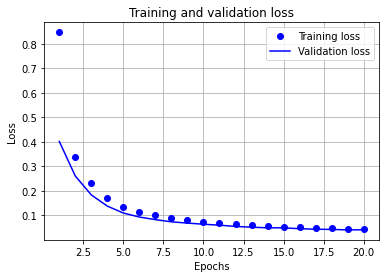

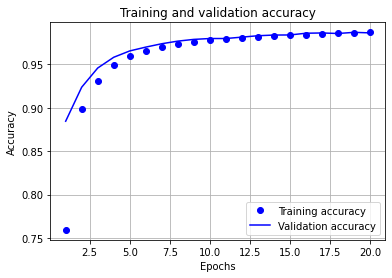

In [9]:
print(hist.history.keys())
loss = hist.history['loss']
print(np.mean(loss))
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

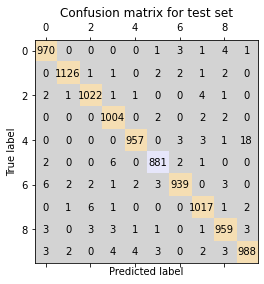

In [10]:
ypred = LeNet5_MNIST.output_.predict(xtest)


cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])
cm = confusion_matrix(ytest.argmax(1), ypred.argmax(1))
plt.matshow(cm, cmap=cmap)

for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
plt.title('Confusion matrix for test set')
plt.xlabel('Predicted label')
plt.ylabel('True label');

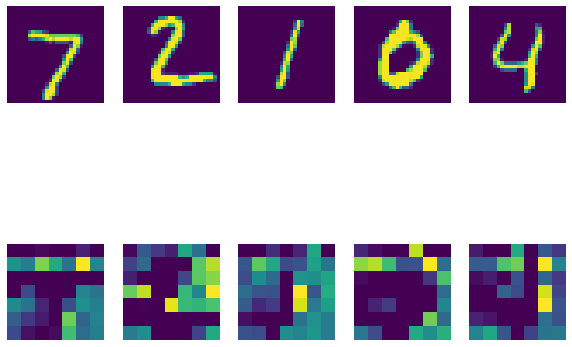

In [36]:
y_inter = LeNet5_MNIST.inter_.predict(xtest[:5])

plt.figure(figsize = (10,8))

plt.subplot(2,5,1)
plt.imshow(tf.squeeze(xtest[0]))
plt.axis('off')

plt.subplot(2,5,6)
plt.imshow(tf.squeeze(y_inter[0]))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(tf.squeeze(xtest[1]))
plt.axis('off')

plt.subplot(2,5,7)
plt.imshow(tf.squeeze(y_inter[1]))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(tf.squeeze(xtest[2]))
plt.axis('off')

plt.subplot(2,5,8)
plt.imshow(tf.squeeze(y_inter[2]))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(tf.squeeze(xtest[3]))
plt.axis('off')

plt.subplot(2,5,9)
plt.imshow(tf.squeeze(y_inter[3]))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(tf.squeeze(xtest[4]))
plt.axis('off')

plt.subplot(2,5,10)
plt.imshow(tf.squeeze(y_inter[4]))
plt.axis('off');

# 2. AlexNet

In [21]:
class AlexNet(Model):
    def __init__(self):
        super(AlexNet, self).__init__()
        inpt = layers.Input(shape=(227, 227 ,1))

        # CL 1:
        x = layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same')(inpt)
        x = layers.BatchNormalization(axis = 3)(x)
        x = layers.Activation('relu')(x)

        x = layers.MaxPooling2D(pool_size = 3, strides = 2, padding = 'valid')(x)

        # CL 2:
        x = layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same')(x)
        x = layers.BatchNormalization(axis = 3)(x)
        x = layers.Activation('relu')(x)
        x = layers.MaxPooling2D(pool_size = 3, strides = 2, padding = 'valid')(x)

        # CL 3:
        for i in range(2):
            x = layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same')(x)
            x = layers.BatchNormalization(axis = 3)(x)
            x = layers.Activation('relu')(x)
            
        # Intermidiate Output:
        o = layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), padding='same')(x)
        o = layers.Activation('relu')(o) 
        self.inter_ = Model(inputs = inpt , outputs = o)

        #CL 4: 
        x = layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same')(x)
        x = layers.Activation('relu')(x)
        x = layers.MaxPooling2D(pool_size = 3, strides = 2, padding = 'valid')(x)


        x = layers.Flatten()(x)

        x = layers.Dense(units = 9216)(x)
        x = layers.Activation('relu')(x)

        x = layers.Dense(units = 4096)(x)
        x = layers.Activation('relu')(x)

        x = layers.Dense(units = 4096)(x)
        x = layers.Activation('relu')(x)

        x = layers.Dense(units = 10)(x)
        x = layers.Activation('softmax')(x)

        self.output_ = Model(inputs=inpt, outputs=x)

    def call(self, x):
        val = self.inter_(x)
        val = self.output_(x)
        return val

AlexNet_MNIST = AlexNet()

In [22]:
xtrain_interpolate = np.zeros((xtrain.shape[0] , 227 , 227 , 1))
for i in range(xtrain.shape[0]):
    xtrain_interpolate[i , : , : , 0] = cv2.resize(xtrain[i], dsize=(227, 227), interpolation=cv2.INTER_CUBIC)
    
xtest_interpolate = np.zeros((xtest.shape[0] , 227 , 227 , 1))
for i in range(xtest.shape[0]):
    xtest_interpolate[i , : , : , 0] = cv2.resize(xtest[i], dsize=(227, 227), interpolation=cv2.INTER_CUBIC)

In [23]:
opt = tf.keras.optimizers.SGD(learning_rate=1e-4)
AlexNet_MNIST.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
hist_alex = AlexNet_MNIST.fit(xtrain_interpolate, ytrain, batch_size=64, epochs=10, validation_data=(xtest_interpolate, ytest), verbose=1, shuffle=True)

Epoch 1/10
938/938 [==============================] - 26s 27ms/step - loss: 1.5310 - accuracy: 0.6810 - val_loss: 0.4546 - val_accuracy: 0.9372
Epoch 2/10
938/938 [==============================] - 22s 23ms/step - loss: 0.3974 - accuracy: 0.9379 - val_loss: 0.2410 - val_accuracy: 0.9565
Epoch 3/10
938/938 [==============================] - 22s 23ms/step - loss: 0.2345 - accuracy: 0.9537 - val_loss: 0.1735 - val_accuracy: 0.9633
Epoch 4/10
938/938 [==============================] - 22s 23ms/step - loss: 0.1759 - accuracy: 0.9627 - val_loss: 0.1394 - val_accuracy: 0.9687
Epoch 5/10
938/938 [==============================] - 22s 24ms/step - loss: 0.1435 - accuracy: 0.9684 - val_loss: 0.1186 - val_accuracy: 0.9727
Epoch 6/10
938/938 [==============================] - 22s 23ms/step - loss: 0.1230 - accuracy: 0.9715 - val_loss: 0.1042 - val_accuracy: 0.9749
Epoch 7/10
938/938 [==============================] - 22s 23ms/step - loss: 0.1089 - accuracy: 0.9740 - val_loss: 0.0937 - val_accuracy:

In [24]:
AlexNet_MNIST.output_.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 227, 227, 1)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 57, 57, 96)        11712     
_________________________________________________________________
batch_normalization_4 (Batch (None, 57, 57, 96)        384       
_________________________________________________________________
activation_16 (Activation)   (None, 57, 57, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 256)       614656    
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 256)       1024

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.2403532788157463
Training and validation loss    :  0.2403532788157463 0.15615632385015488
Training and validation accuracy:  0.9547900021076202 0.9689599990844726


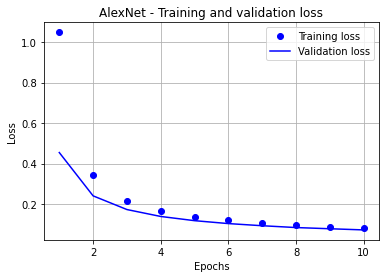

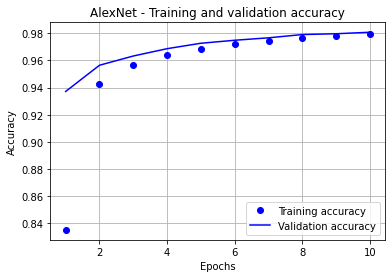

In [25]:
print(hist_alex.history.keys())
loss_alex = hist_alex.history['loss']
print(np.mean(loss_alex))
accuracy_alex = hist_alex.history['accuracy']
val_loss_alex = hist_alex.history['val_loss']
val_accuracy_alex = hist_alex.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss_alex), np.mean(val_loss_alex))
print('Training and validation accuracy: ', np.mean(accuracy_alex), np.mean(val_accuracy_alex))

epochs = range(1, len(loss_alex)+1)

plt.figure()
plt.plot(epochs, loss_alex, 'bo', label='Training loss')
plt.plot(epochs, val_loss_alex, 'b', label='Validation loss')
plt.title('AlexNet - Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

plt.figure()
plt.plot(epochs, accuracy_alex, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_alex, 'b', label='Validation accuracy')
plt.title('AlexNet - Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

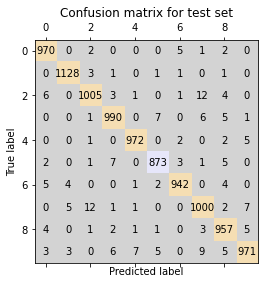

In [26]:
ypred = AlexNet_MNIST.output_.predict(xtest_interpolate)


cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])
cm = confusion_matrix(ytest.argmax(1), ypred.argmax(1))
plt.matshow(cm, cmap=cmap)

for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
plt.title('Confusion matrix for test set')
plt.xlabel('Predicted label')
plt.ylabel('True label');

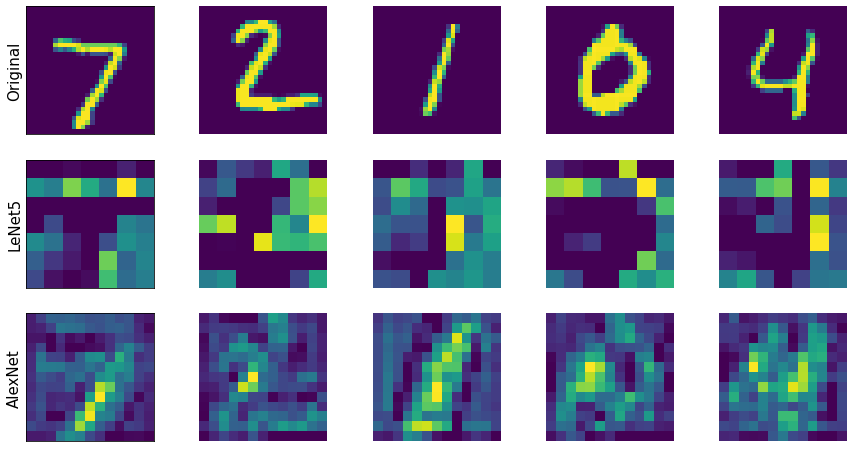

In [34]:
y_inter_alex = AlexNet_MNIST.inter_.predict(xtest_interpolate[:5])

plt.figure(figsize = (15,8))

plt.subplot(3,5,1)
plt.imshow(tf.squeeze(xtest[0]))
plt.ylabel('Original' , fontsize = 15)
plt.xticks([])
plt.yticks([])


plt.subplot(3,5,6)
plt.imshow(tf.squeeze(y_inter[0]))
plt.ylabel('LeNet5' , fontsize = 15)
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,11)
plt.imshow(tf.squeeze(y_inter_alex[0]))
plt.ylabel('AlexNet' , fontsize = 15)
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,2)
plt.imshow(tf.squeeze(xtest[1]))
plt.axis('off')

plt.subplot(3,5,7)
plt.imshow(tf.squeeze(y_inter[1]))
plt.axis('off')

plt.subplot(3,5,12)
plt.imshow(tf.squeeze(y_inter_alex[1]))
plt.axis('off')

plt.subplot(3,5,3)
plt.imshow(tf.squeeze(xtest[2]))
plt.axis('off')

plt.subplot(3,5,8)
plt.imshow(tf.squeeze(y_inter[2]))
plt.axis('off')

plt.subplot(3,5,13)
plt.imshow(tf.squeeze(y_inter_alex[2]))
plt.axis('off')

plt.subplot(3,5,4)
plt.imshow(tf.squeeze(xtest[3]))
plt.axis('off')

plt.subplot(3,5,9)
plt.imshow(tf.squeeze(y_inter[3]))
plt.axis('off')

plt.subplot(3,5,14)
plt.imshow(tf.squeeze(y_inter_alex[3]))
plt.axis('off')

plt.subplot(3,5,5)
plt.imshow(tf.squeeze(xtest[4]))
plt.axis('off')

plt.subplot(3,5,10)
plt.imshow(tf.squeeze(y_inter[4]))
plt.axis('off')

plt.subplot(3,5,15)
plt.imshow(tf.squeeze(y_inter_alex[4]))
plt.axis('off');

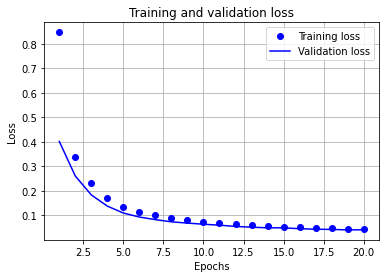

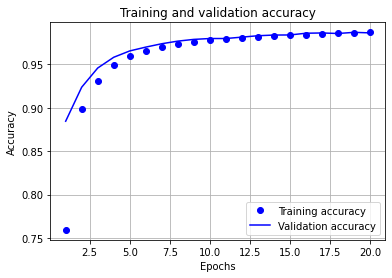

In [38]:
epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# 3. Comparison 

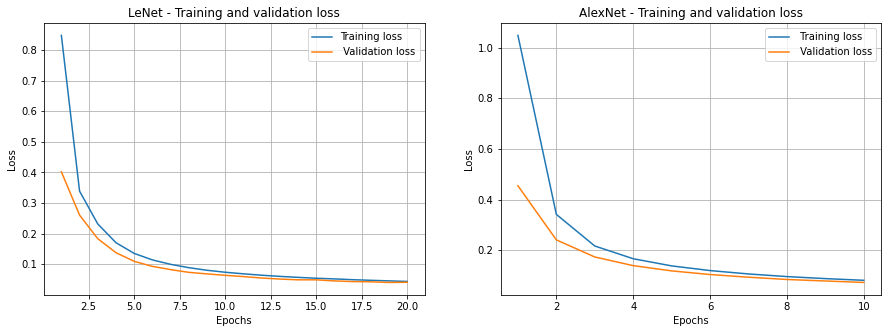

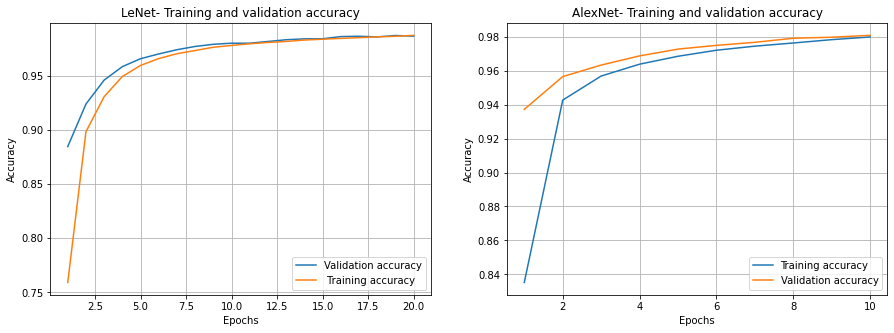

In [56]:
epochs_alex = range(1, len(loss_alex)+1)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label=' Validation loss')
plt.legend()
plt.grid()
plt.title('LeNet - Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(epochs_alex, loss_alex, label=' Training loss')
plt.plot(epochs_alex, val_loss_alex, label=' Validation loss')

plt.title('AlexNet - Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.plot(epochs, accuracy, label=' Training accuracy')

plt.title('LeNet- Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(epochs_alex, accuracy_alex, label='Training accuracy')
plt.plot(epochs_alex, val_accuracy_alex, label='Validation accuracy')
plt.title('AlexNet- Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()